<h1>Unit 7 | Assignment - Distinguishing Sentiments</h1>

<h3>Background</h3>

Twitter has become a wildly sprawling jungle of information &mdash
140 characters at a time. Somewhere between 350 million and 500 million tweets are estimated to be sent out _per day_. With such an explosion of data, on Twitter and elsewhere, it becomes more important than ever to tame it in some way, to concisely capture the essence of the data.

Choose <b>one</b> of the following two assignments, in which you will do just that. Good luck!

<h3>News Mood</h3>

In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: <b>BBC, CBS, CNN, Fox, and New York Times</b>.

The tools of the trade you will need for your task as a data analyst include the following: <b>tweepy, pandas, matplotlib, seaborn, textblob, and VADER.</b><br><br>



In [1]:
# Import dependencies
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import time
from config import api_key, api_secret, a_token, a_token_secret

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(a_token, a_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [26]:
#Get tweets from each news organization's twitter feeds.

# Create an empty list to hold sentiments.
sentiments = []


## I found that using CBSNews vs CBS drastically changed the output. 
## CBS tends to be more positive while CBSNews is more negative. 
## I left both pieces of code to show that either could be used, but opted to use both CBS and CBSNews to 
## illustrate the drastic difference in the two.

# news_outlet = ("@BBCNews", "@CBSNews", "@CNN", "@FoxNews", "@NYTimes")
news_outlet = ("@BBCNews", "@CBS", "@CNN", "@FoxNews", "@NYTimes", "@CBSNews")



# Loop though target users.
for user in news_outlet:
    
    # Counter 
    counter = 1

    # Loop through 5 pages of tweets for each news organization.
    # Get all tweets from the homefeed of each news organization.
    # Each page of tweets = 20, so by calling for a count of 100 
    # we accomplish the same thing with one less nested loop.

    public_tweets = api.user_timeline(user, count=100)

    #Loop through all tweets.
    for tweet in public_tweets:
    
        # Run the Vader analysis on each tweet.
        print("Tweet %s: %s" % (counter, tweet["text"]))

        # Establish the compound score, positive, negativem and neutral scores. 
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        
        # define tweets ago and tweet_text
        tweets_ago = counter
        tweet_text = tweet["text"]

        # Append sentiments for each tweet to the empty sentiments list.
        sentiments.append({"News Outlet" : user,
                           "Date": tweet["created_at"],
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweet Count" : counter,
                           "Tweet Text" : tweet_text})
        
        # Add to counter.
        counter = counter + 1

Tweet 1: Corbyn 'irresponsible' for attending left wing Jewish event https://t.co/GVvt8Svs01
Tweet 2: Tottenham shooting: Girl, 17, dies from gunshot wound https://t.co/yBqpNMY4iD
Tweet 3: UK passports: Firm appeals move to make them in France https://t.co/TnuxN6YaeM
Tweet 4: Bafta TV Awards: 'Must see moment' nominees revealed https://t.co/4Q0hodRzPy
Tweet 5: UK ivory ban among 'toughest' in the world, says Gove https://t.co/zs3TZKrB1d
Tweet 6: 'One-stop shops' set to speed up cancer diagnosis https://t.co/MFhvaEqcKf
Tweet 7: Calor gas shortages leave customers without heating https://t.co/Hs2nF3uNbg
Tweet 8: Momentum admits Labour 'failure' over anti-Semitism https://t.co/O5zEjqutYL
Tweet 9: Met Police investigated over death of arrested man https://t.co/t7pRlNJ8sx
Tweet 10: RT @BBC_HaveYourSay: Have you ever had to choose between the love of your life and your favourite sports team? #harryandmeghan's #RoyalWedd…
Tweet 11: AI 'poses less risk to jobs than feared' says OECD https://t.

Tweet 1: No one does it quite like @eltonofficial. The artist himself will belt out some of his chart-topping hits on Elton… https://t.co/ckY4bUvTXI
Tweet 2: The Las Vegas strip is about to light up brighter than ever before when Country Music’s Party Of The Year® takes ov… https://t.co/j1A2ZVHAoO
Tweet 3: “If you don’t do something about it, then who are you? … It can happen to anyone.” - @aplusk 

Tonight at 10/9c, a… https://t.co/EQabNc1UZI
Tweet 4: Give it up for @KelseaBallerini! This star is one of the Female Vocalist Of The Year nominees and she's ready to ta… https://t.co/wLyHwkEGs2
Tweet 5: Take and post a photo of the woman in your life who inspires you! The photo should only have one person against a n… https://t.co/BHdxXlWfKP
Tweet 6: Expect epic performances by @kanebrown , @kelly_clarkson, @OfficialJackson, and more at this year's 53rd #ACMawards… https://t.co/3yso7Z0cjv
Tweet 7: Will @HIGHVALLEY, @LancoMusic, @LOCASHmusic, @MidlandOfficial, or @runawayjune be named New V

Tweet 1: A dingy, old painting found in an Iowa art gallery's closet turns out to be the work of a 16th-century Dutch master… https://t.co/lwmWxdjL7N
Tweet 2: A coal power company files for bankruptcy and asks President Trump for a bailout https://t.co/ju4AXFbI7b https://t.co/7ylHVUfAz8
Tweet 3: Survivors of a school shooting in Parkland, Florida, returned from spring break to new security measures -- includi… https://t.co/LI2iLBqxzy
Tweet 4: RT @AC360: They "look like the bar scene in Star Wars" Former Obama White House Chief of Staff Leon Panetta on President Trump's choice of…
Tweet 5: The White House is "looking into" embattled EPA Administrator Scott Pruitt's housing situation amid reports that he… https://t.co/iyae5nvbbu
Tweet 6: Winnie Madikizela-Mandela reveals South Africa's uncomfortable truths | By Kevin Bloom via @CNNOpinion… https://t.co/IaJjfOLJK7
Tweet 7: A Cleveland fertility clinic is facing dozens of legal actions after failure of a cryopreservation tank containing… h

Tweet 1: .@kimguilfoyle: “@POTUS didn’t kill DACA…I think the Democrats killed it, and people who were too entrenched in the… https://t.co/mx8ej8vv4P
Tweet 2: Pregnant woman upset with Disney Cruise Line after family escorted out by armed officer https://t.co/KpN8sAJxhW
Tweet 3: .@SebGorka: “If we don’t have borders, the word ‘America’ ceases to have meaning.” #Hannity https://t.co/bqYRYJBjee
Tweet 4: .@MarkSKrikorian: “If you’re an illegal immigrant, and walk up to our immigration inspector at a border, and say ‘H… https://t.co/Bay4PZjna0
Tweet 5: Mom deployed Taser on son to wake him up for church, court docs say https://t.co/77cv8CmPEQ
Tweet 6: Charles Barkley Blasts #Trump Supporters: They Won't Say 'My Life Sucks Because of Me' https://t.co/StltuqmgZF
Tweet 7: Jill McCabe, wife of fired @FBI official Andrew McCabe, breaks silence on campaign money https://t.co/6ElU8SQqDt
Tweet 8: Paul Pitino: "I don't think any human being deserves a statue...When you put up a [statue of a] human,

Tweet 1: The "affluenza teen," who killed 4 people while driving drunk and then fled to Mexico in an effort to evade possibl… https://t.co/LP1GRdTQHS
Tweet 2: It's Villanova vs. Michigan at the NCAA championship game. Not quite David vs. Goliath, but not too far off either.… https://t.co/gNE0aN5Par
Tweet 3: Evening Briefing: Here's what you need to know at the end of the day https://t.co/mQEcGIIDjO
Tweet 4: RT @DavidWaldstein: Tonight, Duncan Robinson becomes the first person to play in Div. III and Div. 1 title games. Here’s a story I did last…
Tweet 5: Top-seeded Villanova and third-seeded Michigan are both among the best teams in college basketball. But are they eq… https://t.co/CBiUbihaO5
Tweet 6: RT @HirokoTabuchi: The EPA is set to challenge California's decades-old right to set its own air pollution rules, setting up a showdown bet…
Tweet 7: Villanova vs. Michigan: What to expect in the NCAA men's championship game https://t.co/NvuKsAkWbP
Tweet 8: Adults may try and spoil colleg

Tweet 1: The Justice Department is suing California over its attempt to block the sale of federal lands within the state's b… https://t.co/DcTHQNVTJx
Tweet 2: Planned Parenthood President @CecileRichards told CBSN's Red &amp; Blue she plans on being "cheerleader on the sideline… https://t.co/m4Wm2wwHV6
Tweet 3: The Wildcats opened up as 6.5 point favorites to take home the title for their second time in the past two years, b… https://t.co/urZpKiBGhm
Tweet 4: Martin Luther King's three surviving children talked with CBS News about his legacy in their first joint interview… https://t.co/QX00muYgan
Tweet 5: The Michigan Wolverines will face off against the Villanova Wildcats for the NCAA title tonight. Here's how to watc… https://t.co/egFa0Iomrb
Tweet 6: Crews used "Batman-like tools" to find teen stuck in Los Angeles sewer pipe for 13 hours. https://t.co/9vz63E1vpY https://t.co/oa0n7BhuER
Tweet 7: Hundreds of schools were closed Monday in Oklahoma and Kentucky as teachers went on strike 

In [27]:
# Create a dataframe with the sentiments information
sentiments_df = pd.DataFrame.from_dict(sentiments)#check

# Describe the sentiments_df to verify the correct count and number of unique news outlets. 
sentiments_df["News Outlet"].describe()

count          600
unique           6
top       @NYTimes
freq           100
Name: News Outlet, dtype: object

In [28]:
# Here, restructure the DataFrame in a better order
sentiments_csv = sentiments_df[['News Outlet','Date', 'Compound','Positive',
                                'Neutral','Negative', 'Tweet Count', 'Tweet Text']]

# Print the number of rows and cols to check 
print(sentiments_csv.shape)

# Print the first five rows as a check. 
sentiments_csv.head()

(600, 8)


,News Outlet,Date,Compound,Positive,Neutral,Negative,Tweet Count,Tweet Text
0,@BBCNews,Tue Apr 03 01:36:13 +0000 2018,0.0000,0.000,1.000,0.000,1,Corbyn 'irresponsible' for attending left wing...
1,@BBCNews,Tue Apr 03 01:24:10 +0000 2018,0.0000,0.000,1.000,0.000,2,"Tottenham shooting: Girl, 17, dies from gunsho..."
2,@BBCNews,Tue Apr 03 00:31:28 +0000 2018,0.0000,0.000,1.000,0.000,3,UK passports: Firm appeals move to make them i...
3,@BBCNews,Mon Apr 02 23:55:11 +0000 2018,0.4588,0.273,0.727,0.000,4,Bafta TV Awards: 'Must see moment' nominees re...
4,@BBCNews,Mon Apr 02 23:43:30 +0000 2018,-0.5574,0.000,0.735,0.265,5,"UK ivory ban among 'toughest' in the world, sa..."


In [29]:
# Export the DataFrame to as CSV file and save it.
sentiments_csv.to_csv("News Mood Tweets.csv", index=False)

<h3>Chart 1: Scatter Plot</h3>
The first plot will be and/or feature the following:

<ul>
<li>Be a scatter plot of sentiments of the last <b>100</b> tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.</li>
<li>Each plot point will reflect the <b>compound</b> sentiment of a tweet.</li>
<li>Sort each plot point by its relative timestamp</li></ul>


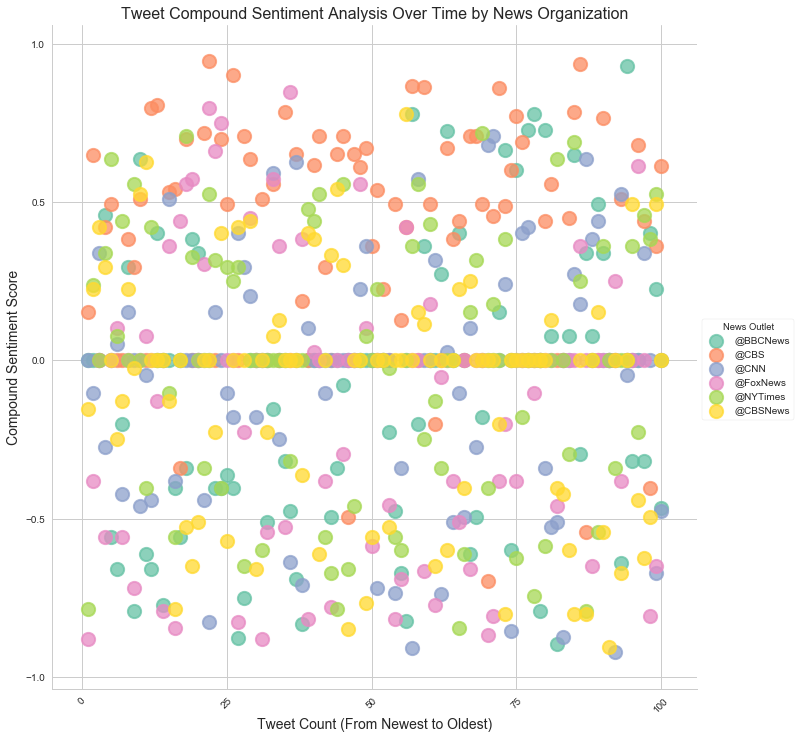

In [30]:
# Set Seaborn style
sns.set()
orgPalette = sns.color_palette("Set2", len(news_outlet))
sns.set_palette(orgPalette)
sns.set_style("whitegrid", {'legend.frameon':True})

# Create the Scatter Plot
compoundSentByTime_plot = sns.lmplot(x="Tweet Count", y="Compound", 
                                data=sentiments_csv, 
                                palette=orgPalette, hue='News Outlet',
                                fit_reg=False, legend=True, size=10, 
                                scatter_kws={'s':175, 'alpha':0.75,
                                             'edgecolors':'face', 
                                             'linewidths':2})

# Establish labels for x-axis and y-axis
plt.xlabel("Tweet Count (From Newest to Oldest)",size=14)
plt.ylabel("Compound Sentiment Score", size=14)

# Create the chart title and tickers
plt.title("Tweet Compound Sentiment Analysis Over Time by News Organization", 
          size=16)
plt.locator_params(nbins=5)
plt.xticks(rotation=45)

#Show the Scatter Plot
plt.show()

# Save the Scatter Plot
plt.savefig("CompoundSentimentAnalysis_Scatterplot.png")

In [31]:
# Find the mean of the compound sentiments by news source
scoresbyoutlet=sentiments_csv.groupby('News Outlet')["Compound"].mean()

# Check 
scoresbyoutlet

News Outlet
@BBCNews   -0.083322
@CBS        0.344901
@CBSNews   -0.093271
@CNN       -0.053323
@FoxNews   -0.116770
@NYTimes   -0.008691
Name: Compound, dtype: float64

In [32]:

x_axis=np.arange(len(scoresbyoutlet))

In [33]:
# Check
scoresbyoutlet

News Outlet
@BBCNews   -0.083322
@CBS        0.344901
@CBSNews   -0.093271
@CNN       -0.053323
@FoxNews   -0.116770
@NYTimes   -0.008691
Name: Compound, dtype: float64

<h3>Chart 2: Bar Graph</h3>
The second plot will be a bar plot visualizing the <b>overall</b> sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

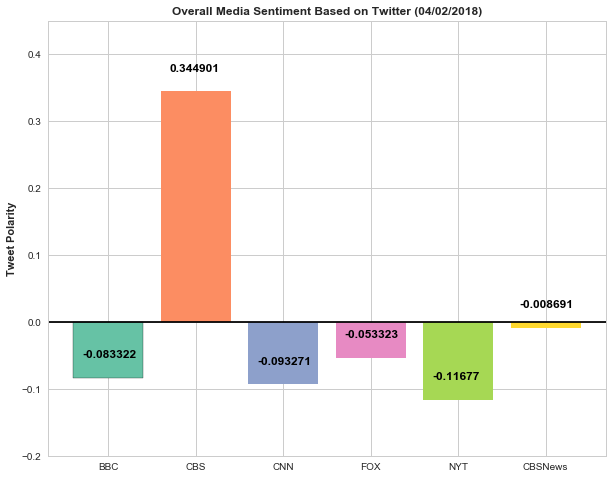

In [35]:
# Set Seaborn style
sns.set()
orgPalette = sns.color_palette("Set2", len(news_outlet))
sns.set_palette(orgPalette)
sns.set_style("whitegrid")

# Set figure size
plt.figure(figsize = (10,8))

# Create bar graph
plt.bar(x_axis,scoresbyoutlet, label = news_outlet, color = orgPalette, edgecolor = "black")

for i, v in enumerate(scoresbyoutlet):
    plt.text(i-.3, v+.03, str(v).format(), color='black', fontweight='bold')

# Creates chart title
plt.title("Overall Media Sentiment Based on Twitter (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')

# Establish ylim and labels 
plt.ylim(-.2, .45)
plt.ylabel("Tweet Polarity",fontweight='bold')
x_labels = ["BBC", "CBS", "CNN", "FOX", "NYT", "CBSNews"]

# Creates tickers
x_locations = [value for value in np.arange(6)]#tick locations
plt.xticks(x_locations, x_labels)

# Adds a horizontal line at zero
plt.axhline(y=0, color = 'black') 

#Show the Scatter Plot
plt.show()

# Save the Scatter Plot
plt.savefig('Overall Media Sentiment Based on Twitter.png')

<h3>Your final Jupyter notebook must:</h3>

* Pull last 100 tweets from each outlet.
* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
* Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* Export the data in the DataFrame into a CSV file.
* Save PNG images for each plot.

<h3>As final considerations:</h3>

* Use the Matplotlib and Seaborn libraries.
* Include a written description of three observable trends based on the data.
* Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
* Include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.

<h1>Observations:</h1>
* In examining the scatter plot, it seems that all five of the news stations produce neutral tweets; however, it appears the CBSNews, NYTimes, and FoxNews have the most neutral tweets. It should be noted that this is not conclusive based on the scatter plot alone.
* Based on the bar chart, CBS is far more positive than any of the other news stations, especially compared to CBSNews, which trends more negative.
* Based on the last pull of tweets, NYTimes is the most negative in sentiment followed by CNN. This seems rather shocking when compared to the other outlets. 

<h3>Other considerations: </h3>
While both the scatter plot and bar chart illustrate the sentiment of each news outlets last 100 tweets, it does not give a conclusive or holisitc image of the news outlets' tweets. A more longitudinal analysis would need to be done for more conclusive insight. 

Additionally, while the assumption is that each of these outlets is producing <i>news</i>, the project never defined what news is. For example, news includes politics, NCAA basketball, technology, and many other topics. A news station who reports more on politics could result in skewed data (assumption is skewed negatively) compared to a news outlet that has spent a significant number of tweets discussing NCAA basketball champions.  

These factors may or may not impact the data shown, but is worth noting. 